<a href="https://colab.research.google.com/github/SebaCarrilloS/Formacion-Data-Science/blob/main/Precio_Casas_Regularizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Desafío 5 - Aprendizaje supervisado y no supervisado (Parte IV)**

Nombre: Sebastián Carrillo

Curso: Machine Learning (G80)

# Descripción


Como Cientista de Datos te han contratado en una importante empresa de propiedades para analizar las diferentes características de algunas casas que se han vendido en el último tiempo, y que se encuentran en el dataset house_data.xlsx. Esta base de datos contiene diversas características de estas propiedades y su precio. Específicamente, se te solicita:



1. Analizar la calidad de datos, para lo que debes cargarlos y realizar un proceso exhaustivo de limpieza para eliminar valores faltantes, duplicados y atípicos que puedan afectar la calidad del modelo, si los hay.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('/content/drive/MyDrive/Formación Data Science/Desafío Latam/Módulo 5 - Machine Learning/Desafios/Desafio 5/house_data.xlsx')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isna().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [6]:
df.duplicated().sum()

0

In [7]:
## Eliminamos columnas que no nos aportan.
df=df.drop(columns=["id","date","zipcode"], axis=1)

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mostrar límites y valores atípicos
print(f"Límite inferior: {lower_bound}")
print(f"Límite superior: {upper_bound}")

# Filtrar outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Número de outliers detectados: {len(outliers)}")

# Ver qué porcentaje del dataset son outliers
percentage_outliers = len(outliers) / len(df) * 100
print(f"Porcentaje de outliers: {percentage_outliers:.2f}%")

Límite inferior: -162625.0
Límite superior: 1129575.0
Número de outliers detectados: 1146
Porcentaje de outliers: 5.30%


In [10]:
## Eliminamos posibles outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

Text(0, 0.5, 'Precio')

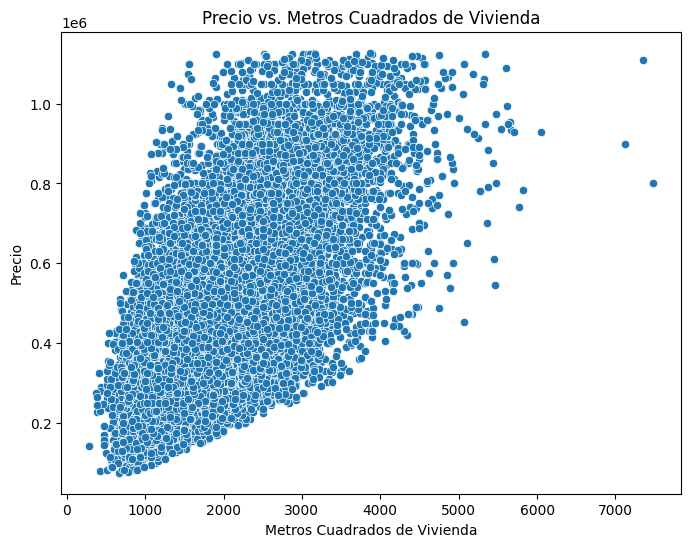

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Precio vs. Metros Cuadrados de Vivienda')
plt.xlabel('Metros Cuadrados de Vivienda')
plt.ylabel('Precio')

In [12]:
df[df["sqft_living"]>6500]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
2713,1110000,5,3.50,7350,12231,2.0,0,4,3,11,4750,2600,2001,0,47.5373,-121.865,5380,12587
4024,800000,7,6.75,7480,41664,2.0,0,2,3,11,5080,2400,1953,0,47.4643,-122.368,2810,33190
21050,900000,5,6.00,7120,40806,2.0,0,4,3,12,5480,1640,2007,0,47.5451,-122.114,3440,36859


In [13]:
## Eliminamos estos 3 outliers
df.drop(df[df["sqft_living"]>6500].index, inplace=True)

Text(0, 0.5, 'Precio')

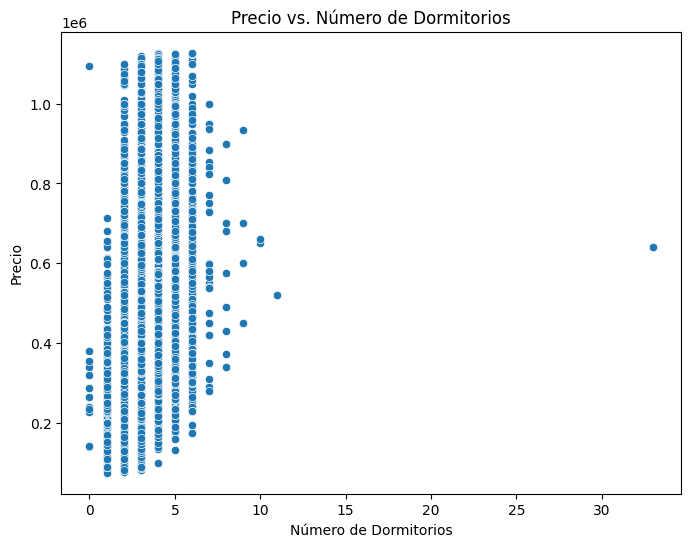

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Precio vs. Número de Dormitorios')
plt.xlabel('Número de Dormitorios')
plt.ylabel('Precio')

In [15]:
df[df["bedrooms"]>30]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
15870,640000,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,47.6878,-122.331,1330,4700


In [16]:
## Eliminamos outlier
df.drop(df[df["bedrooms"]>30].index, inplace=True)

## A considerar:

*  Se eliminaron posibles outliers tanto de `price` como de otros puntos que se ven reflejados en los scatterplots y boxplots correspondientes.
*  El objetivo es que estos puntos no alteren de manera significativa al resultado cuando se introduzcan los datos en los modelos correspondientes.

In [17]:
df.corr()["price"].drop("price").sort_values()

,price
condition,0.038406
waterfront,0.051489
yr_built,0.060974
long,0.070588
sqft_lot15,0.082316
yr_renovated,0.083706
sqft_lot,0.093891
sqft_basement,0.234602
view,0.237139
floors,0.273839


Text(0, 0.5, 'Correlación')

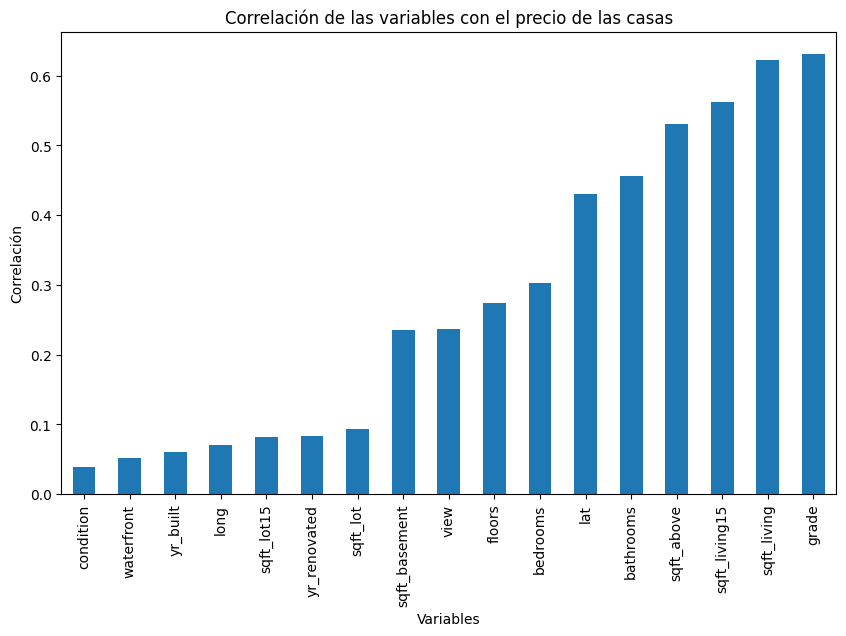

In [18]:
df.corr()["price"].drop("price").sort_values().plot(kind='bar', figsize=(10, 6))

plt.title('Correlación de las variables con el precio de las casas')
plt.xlabel('Variables')
plt.ylabel('Correlación')


## Puntos a considerar:

*  `grade` es el factor que más correlación tiene con `price`, al igual que `sqft_living` y `sqft_living15`.
*  `condition`, `waterfront` y `yr_built` tienen poca correlación con `price`, siendo casi cercanos a 0.
*  Vemos que, en general, las correlaciones con `price` no son del todo altas, incluso en los casos donde es más grande, solo 4 variables tienen correlación mayor a 0.5

## 3. Aplicar técnicas de transformación de datos, como normalización o estandarización, para asegurar que las variables estén en una escala comparable. Luego de ello, divide el conjunto de datos en conjuntos de entrenamiento y prueba de manera aleatoria o estratificada.


In [19]:
X=df.drop(columns=["price"], axis=1)
y=df["price"]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Implementar modelos de regresión lineal con regularización, como Ridge, Lasso o Elastic Net y ajuste los hiper parámetros mostrando como se mueve los hiperparametros y el ajuste. Además, debes construir modelos de árboles de regresión para capturar relaciones no lineales y complejas entre las variables predictoras y el precio de las casas.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import pickle

In [24]:
def find_best_model(X, y):

    lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
    ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
    elastic_params = {'alpha': [0.001, 0.01, 0.1, 1, 10],
                      'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
    tree_params = {'max_depth': [None, 10, 20, 30],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 2, 4]}

    lasso = Lasso()
    ridge = Ridge()
    elastic = ElasticNet()
    tree = DecisionTreeRegressor()

    models = [lasso, ridge, elastic, tree]
    params = [lasso_params, ridge_params, elastic_params, tree_params]

    best_model = None
    best_params = None
    best_score = float('-inf')

    models_save = []

    for model, param_grid in zip(models, params):
        grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error')
        grid_search.fit(X, y)

        current_best_score = -grid_search.best_score_

        if current_best_score > best_score:
            best_score = current_best_score
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_

        # Mostrar resultados
        print("Best Model: ", grid_search.best_estimator_)
        print("Best params: ", grid_search.best_params_)
        print("Best MSE: ", current_best_score)
        print('-'*100)

        models_save.append(grid_search.best_estimator_)

    return best_model, best_params, models_save


In [25]:
best_model, best_params, models_save = find_best_model(X_train, y_train)

print("El mejor modelo es:", best_model)
print("Con los mejores hiperparámetros:", best_params)

Best Model:  Lasso(alpha=10)
Best params:  {'alpha': 10}
Best MSE:  13331582654.593714
----------------------------------------------------------------------------------------------------
Best Model:  Ridge(alpha=10)
Best params:  {'alpha': 10}
Best MSE:  13331530522.608128
----------------------------------------------------------------------------------------------------
Best Model:  ElasticNet(alpha=0.01, l1_ratio=0.7)
Best params:  {'alpha': 0.01, 'l1_ratio': 0.7}
Best MSE:  13331489838.146328
----------------------------------------------------------------------------------------------------
Best Model:  DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)
Best params:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best MSE:  9484248720.8516
----------------------------------------------------------------------------------------------------
El mejor modelo es: Lasso(alpha=10)
Con los mejores hiperparámetros: {'alpha': 10}


In [26]:
def evaluation_model(model, X_test, y_test, name):
    y_predict = model.predict(X_test)
    print('R2: ', np.round(r2_score(y_test, y_predict),2))
    print('RMSE: ', np.round(np.sqrt(mean_squared_error(y_test, y_predict))))
    print('MAPE: ', np.round(mean_absolute_percentage_error(y_test,y_predict),3))
    with open(f'./{name}_cars.pkl', 'wb') as f:
        pickle.dump(best_model, f)

In [27]:
names = ['lasso', 'ridge', 'elastic_net', 'regresion_tree']
models=models_save

for n, m in zip(names, models):
    print(n)
    evaluation_model(m, X_test, y_test, n)
    print('-'*100)

lasso
R2:  0.69
RMSE:  114376.0
MAPE:  0.202
----------------------------------------------------------------------------------------------------
ridge
R2:  0.69
RMSE:  114375.0
MAPE:  0.202
----------------------------------------------------------------------------------------------------
elastic_net
R2:  0.69
RMSE:  114375.0
MAPE:  0.202
----------------------------------------------------------------------------------------------------
regresion_tree
R2:  0.77
RMSE:  97810.0
MAPE:  0.153
----------------------------------------------------------------------------------------------------


## Conclusiones:

*  Los 3 modelos lineales propuestos (Lasso, Ridge y ElasticNet) tienen un MSE muy similar en torno a 13,339,000,000, siendo la diferencia entre ellos es mínima, lo que indica que estos modelos tienen un rendimiento prácticamente idéntico con los hiperparámetros seleccionados.
*  Los tres modelos lineales tienen el mismo valor de $R^{2}$, un RMSE en torno a 114,375 y MAPE de 0.202. Esto sugiere que su capacidad explicativa y la precisión de sus predicciones no varía entre los tres.
*  El ajuste es decente pero lejos de ser óptimo. Aunque capturan parte de la variabilidad de los datos (69%), no logran un nivel de precisión tan alto como el modelo no lineal.
*  En cuanto al modelo de árbol de decisión, este supera a los modelos lineales con una MSE mucho menor de 9,622,976,063, lo que indica un mejor ajuste.
*  El  $R^{2}$ es del árbol de decisión indica que este modelo explica el 77% de la variabilidad en los datos, lo que representa un aumento significativo respecto a los modelos lineales.
*  El RMSE es más bajo (97,743) y el MAPE es de 0.153, lo que sugiere que este modelo tiene predicciones más precisas, con un menor error absoluto promedio.
*  A pesar de que el modelo de Lasso fue seleccionado como el mejor en una etapa anterior, los resultados comparativos muestran que el árbol de decisión supera a todos los modelos lineales en términos de MSE, $R^{2}$, RMSE y MAPE.
*  El árbol de decisión, con una estructura más flexible que puede capturar no linealidades en los datos, es el mejor modelo en este caso, con un rendimiento significativamente mejor que los modelos lineales.


